<table>
    <tr>
        <td>
            <h1>
                <center>
                    <h1>Predicting the news popularity in multiple social media platforms</h1>
                </center>
            </h1>
        </td>
</table>

#### Data Description
 This is a large data set of news items and their respective social feedback on multiple platforms: Facebook, Google+ and LinkedIn.The collected data relates to a period of 8 months, between November 2015 and July 2016, accounting for about 100,000 news items on four different topics: Economy, Microsoft, Obama and Palestine.

#### File descriptions
- News_Final.csv - the News Final set (contains 93239 News records)

#### Data fields
- `IDLink` : Unique identifier of news items</br>

- `Title` : Title of the news item according to the official media sources</br>

- `Headline` : Headline of the news item according to the official media sources</br>

- `Source` : Original news outlet that published the news item</br>

- `Topic` : Query topic used to obtain the items in the official media sources</br> 

- `PublishDate` : Date and time of the news items' publication

- `SentimentTitle` : Sentiment score of the text in the news items' title

- `SentimentHeadline` : Sentiment score of the text in the news items'headline

- `Facebook` : Final value of the news items' popularity according to the social media source Facebook

- `GooglePlus` : Final value of the news items' popularity according to the social media source Google+

- `LinkedIn` : Final value of the news items' popularity according to the social media source LinkedIn

## Import Required Libraries

In [1]:
# Import numpy 
import numpy as np

# Import pandas
import pandas as pd

# Import Matplotlib
import matplotlib.pyplot as plt 

# Import seaborn
import seaborn as sns

# To Avoid warning
from warnings import filterwarnings
filterwarnings('ignore')

# For Scaling
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

# For Splitting purpose
from sklearn.model_selection import train_test_split

# For Linear regression(OLS)
import statsmodels
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# For model performance(OLS)
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


# For feature selection in OLS
from statsmodels.stats.outliers_influence import variance_inflation_factor

# For DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# For Model performance(DT)
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report

# For Cross validation 
from sklearn.model_selection import GridSearchCV

# For Sampling purpose 
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

## Read The Data

In [2]:
# Load the Data 
df_newsone = pd.read_csv("News_Final.csv")

# Print the first 5 record
df_newsone.head()

,IDLink,Title,Headline,Source,Topic,PublishDate,SentimentTitle,SentimentHeadline,Facebook,GooglePlus,LinkedIn
0,99248.0,Obama Lays Wreath at Arlington National Cemetery,Obama Lays Wreath at Arlington National Cemete...,USA TODAY,obama,2002-04-02 00:00:00,0.000000,-0.053300,-1,-1,-1
1,10423.0,A Look at the Health of the Chinese Economy,"Tim Haywood, investment director business-unit...",Bloomberg,economy,2008-09-20 00:00:00,0.208333,-0.156386,-1,-1,-1
2,18828.0,Nouriel Roubini: Global Economy Not Back to 2008,"Nouriel Roubini, NYU professor and chairman at...",Bloomberg,economy,2012-01-28 00:00:00,-0.425210,0.139754,-1,-1,-1
3,27788.0,Finland GDP Expands In Q4,Finland's economy expanded marginally in the t...,RTT News,economy,2015-03-01 00:06:00,0.000000,0.026064,-1,-1,-1
4,27789.0,"Tourism, govt spending buoys Thai economy in J...",Tourism and public spending continued to boost...,The Nation - Thailand&#39;s English news,economy,2015-03-01 00:11:00,0.000000,0.141084,-1,-1,-1


### Step 1 : Overview of data

1 Shape of the data</br>
2 Check the columns(features)</br>
3 Describe the dataset</br>
4 Check for data types</br>

#### 1. Shape Of The Data 

In [3]:
df_newsone.shape

(93239, 11)

There are `93239` observation and `11` features

#### 2. Check the columns

In [4]:
df_newsone.columns

Index(['IDLink', 'Title', 'Headline', 'Source', 'Topic', 'PublishDate',
       'SentimentTitle', 'SentimentHeadline', 'Facebook', 'GooglePlus',
       'LinkedIn'],
      dtype='object')

- `IDLink`(numeric): Unique identifier of news items</br>

- `Title` (string): Title of the news item according to the official media sources</br>

- `Headline` (string): Headline of the news item according to the official media sources</br>

- `Source` (string): Original news outlet that published the news item</br>

- `Topic` (string): Query topic used to obtain the items in the official media sources</br>

- `PublishDate` (timestamp): Date and time of the news items' publication

- `SentimentTitle` (numeric): Sentiment score of the text in the news items' title

- `SentimentHeadline` (numeric): Sentiment score of the text in the news items' headline

- `Facebook` (numeric): Final value of the news items' popularity according to the social media source Facebook

- `GooglePlus` (numeric): Final value of the news items' popularity according to the social media source Google+

- `LinkedIn` (numeric): Final value of the news items' popularity according to the social media source LinkedIn

#### Describe the dataset

In [5]:
df_newsone.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
IDLink,93239.0,NaN,NaN,NaN,51560.653257,30391.078704,1.0,24301.5,52275.0,76585.5,104802.0
Title,93239,81259,Business Highlights,37,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Headline,93224,86694,Read full story for latest details.,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Source,92960,5756,Bloomberg,1732,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Topic,93239,4,economy,33928,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PublishDate,93239,82644,2016-05-19 00:00:00,112,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SentimentTitle,93239.0,NaN,NaN,NaN,-0.005411,0.136431,-0.950694,-0.079057,0.0,0.064255,0.962354
SentimentHeadline,93239.0,NaN,NaN,NaN,-0.027493,0.141964,-0.755433,-0.114574,-0.026064,0.059709,0.964646
Facebook,93239.0,NaN,NaN,NaN,113.141336,620.173233,-1.0,0.0,5.0,33.0,49211.0
GooglePlus,93239.0,NaN,NaN,NaN,3.888362,18.492648,-1.0,0.0,0.0,2.0,1267.0


- There is no need to apply outlier treatment over the dataframe beacuse there is no mejor diffrence between `mean` column and `50%` column 


- There is null values in `Headline` and `Source` columns

#### Check for data types

In [6]:
df_newsone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93239 entries, 0 to 93238
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   IDLink             93239 non-null  float64
 1   Title              93239 non-null  object 
 2   Headline           93224 non-null  object 
 3   Source             92960 non-null  object 
 4   Topic              93239 non-null  object 
 5   PublishDate        93239 non-null  object 
 6   SentimentTitle     93239 non-null  float64
 7   SentimentHeadline  93239 non-null  float64
 8   Facebook           93239 non-null  int64  
 9   GooglePlus         93239 non-null  int64  
 10  LinkedIn           93239 non-null  int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 7.8+ MB


- we can change datatype for `IDLink` columns

##### Interpretation 
- There are 93239 observation and 11 features
- There is null values in `Headline` and `Source` columns
- we can change datatype for `IDLink` columns

#### Action 

In [7]:
df_newsone.IDLink.value_counts()

80690.0    2
28854.0    2
81052.0    2
80994.0    2
99248.0    1
          ..
74445.0    1
74382.0    1
19495.0    1
19566.0    1
61870.0    1
Name: IDLink, Length: 93235, dtype: int64

In [8]:
df_newsone.IDLink= df_newsone.IDLink.astype('int')             

### Step 2 : Null values check 

In [9]:
(df_newsone.isnull().sum()*100)/len(df_newsone)

IDLink               0.000000
Title                0.000000
Headline             0.016088
Source               0.299231
Topic                0.000000
PublishDate          0.000000
SentimentTitle       0.000000
SentimentHeadline    0.000000
Facebook             0.000000
GooglePlus           0.000000
LinkedIn             0.000000
dtype: float64

- there is 0.29% null values in `Source` so we drop that rows
- and `Headline` columns 0.016% null values 

In [10]:
df_newsone=df_newsone.dropna().copy()

In [11]:
df_newsone.to_csv("remove_null_value.csv",index=False)

In [12]:
df_news = pd.read_csv("remove_null_value.csv")
df_news.head()

,IDLink,Title,Headline,Source,Topic,PublishDate,SentimentTitle,SentimentHeadline,Facebook,GooglePlus,LinkedIn
0,99248,Obama Lays Wreath at Arlington National Cemetery,Obama Lays Wreath at Arlington National Cemete...,USA TODAY,obama,2002-04-02 00:00:00,0.000000,-0.053300,-1,-1,-1
1,10423,A Look at the Health of the Chinese Economy,"Tim Haywood, investment director business-unit...",Bloomberg,economy,2008-09-20 00:00:00,0.208333,-0.156386,-1,-1,-1
2,18828,Nouriel Roubini: Global Economy Not Back to 2008,"Nouriel Roubini, NYU professor and chairman at...",Bloomberg,economy,2012-01-28 00:00:00,-0.425210,0.139754,-1,-1,-1
3,27788,Finland GDP Expands In Q4,Finland's economy expanded marginally in the t...,RTT News,economy,2015-03-01 00:06:00,0.000000,0.026064,-1,-1,-1
4,27789,"Tourism, govt spending buoys Thai economy in J...",Tourism and public spending continued to boost...,The Nation - Thailand&#39;s English news,economy,2015-03-01 00:11:00,0.000000,0.141084,-1,-1,-1


In [13]:
df_news.isnull().sum()

IDLink               0
Title                0
Headline             0
Source               0
Topic                0
PublishDate          0
SentimentTitle       0
SentimentHeadline    0
Facebook             0
GooglePlus           0
LinkedIn             0
dtype: int64

### Step 3 : Outlier Treatment

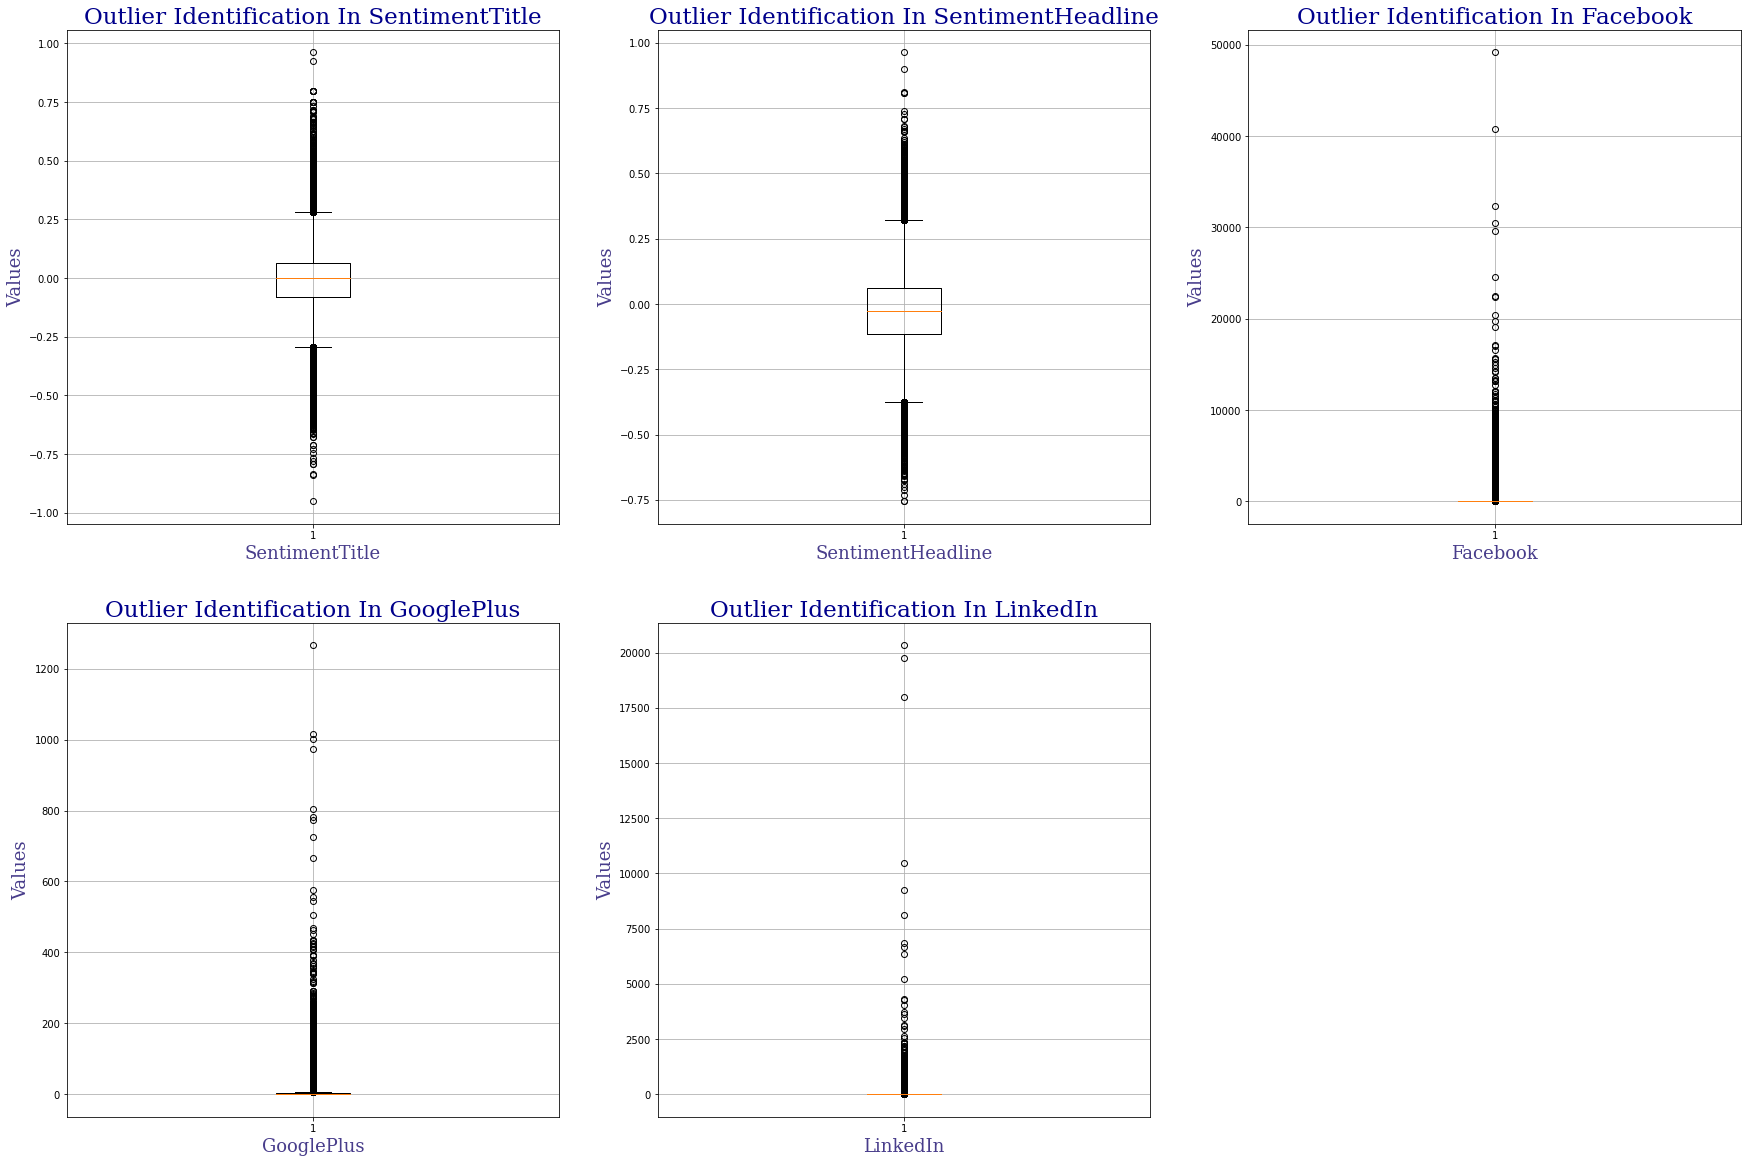

In [14]:
# Set font style for x_label & y_label
font = {'family':'serif',
        'color':'darkslateblue',
        'weight':'normal',
        'size':18,
        }

# Set font style for title
font_one = {'family':'serif',
        'color':'darkblue',
        'weight':'normal',
        'size':23,
        }

# Set figure size 
plt.figure(figsize=(30,20))

# Use the subplots for convinant 
# SentimentTitle feature 
plt.subplot(2, 3, 1)
plt.boxplot(df_news.SentimentTitle)
plt.xlabel("SentimentTitle",fontdict=font)
plt.ylabel("Values",fontdict=font)
plt.grid()
plt.title("Outlier Identification In SentimentTitle",fontdict=font_one,loc='center')

# SentimentHeadline feature
plt.subplot(2, 3, 2)
plt.boxplot(df_news.SentimentHeadline)
plt.xlabel("SentimentHeadline",fontdict=font)
plt.ylabel("Values",fontdict=font)
plt.grid()
plt.title("Outlier Identification In SentimentHeadline",fontdict=font_one,loc='center')

# Facebook feature
plt.subplot(2, 3, 3)
plt.boxplot(df_news.Facebook)
plt.xlabel("Facebook",fontdict=font)
plt.ylabel("Values",fontdict=font)
plt.grid()
plt.title("Outlier Identification In Facebook",fontdict=font_one,loc='center')

# GooglePlus feature
plt.subplot(2, 3, 4)
plt.boxplot(df_news.GooglePlus)
plt.xlabel("GooglePlus",fontdict=font)
plt.ylabel("Values",fontdict=font)
plt.grid()
plt.title("Outlier Identification In GooglePlus",fontdict=font_one,loc='center')

# LinkedIn feature
plt.subplot(2, 3, 5)
plt.boxplot(df_news.LinkedIn)
plt.xlabel("LinkedIn",fontdict=font)
plt.ylabel("Values",fontdict=font)
plt.grid()
plt.title("Outlier Identification In LinkedIn",fontdict=font_one,loc='center')

plt.show()

- There is no outliers in data 

## EDA (Exploratory Data Analysis)

In [15]:
df_news.head()

,IDLink,Title,Headline,Source,Topic,PublishDate,SentimentTitle,SentimentHeadline,Facebook,GooglePlus,LinkedIn
0,99248,Obama Lays Wreath at Arlington National Cemetery,Obama Lays Wreath at Arlington National Cemete...,USA TODAY,obama,2002-04-02 00:00:00,0.000000,-0.053300,-1,-1,-1
1,10423,A Look at the Health of the Chinese Economy,"Tim Haywood, investment director business-unit...",Bloomberg,economy,2008-09-20 00:00:00,0.208333,-0.156386,-1,-1,-1
2,18828,Nouriel Roubini: Global Economy Not Back to 2008,"Nouriel Roubini, NYU professor and chairman at...",Bloomberg,economy,2012-01-28 00:00:00,-0.425210,0.139754,-1,-1,-1
3,27788,Finland GDP Expands In Q4,Finland's economy expanded marginally in the t...,RTT News,economy,2015-03-01 00:06:00,0.000000,0.026064,-1,-1,-1
4,27789,"Tourism, govt spending buoys Thai economy in J...",Tourism and public spending continued to boost...,The Nation - Thailand&#39;s English news,economy,2015-03-01 00:11:00,0.000000,0.141084,-1,-1,-1


### 1. Univrient Analysis

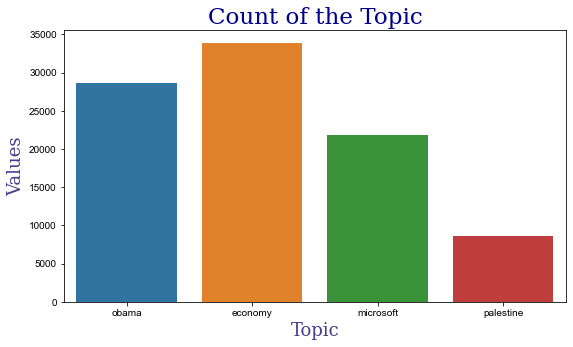

In [16]:
plt.figure(figsize=(9,5))
sns.countplot(df_news.Topic)
sns.set_style("whitegrid")
plt.xlabel("Topic",fontdict=font)
plt.ylabel("Values",fontdict=font)
plt.title("Count of the Topic",fontdict=font_one,loc='center')
plt.show()

In [17]:
df_notText = df_news[["Facebook","GooglePlus","LinkedIn","SentimentTitle","SentimentHeadline"]].copy()

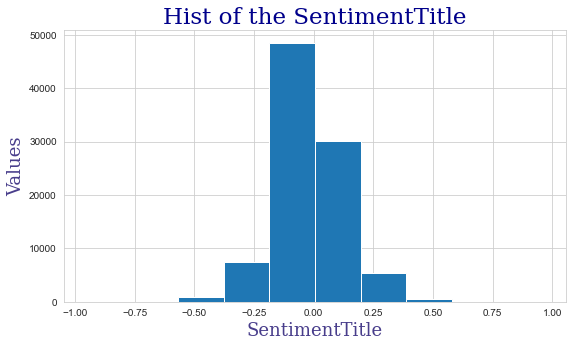

In [18]:
plt.figure(figsize=(9,5))
df_notText["SentimentTitle"].hist()
sns.set_style("whitegrid")
plt.xlabel("SentimentTitle",fontdict=font)
plt.ylabel("Values",fontdict=font)
plt.title("Hist of the SentimentTitle",fontdict=font_one,loc='center')
plt.show()

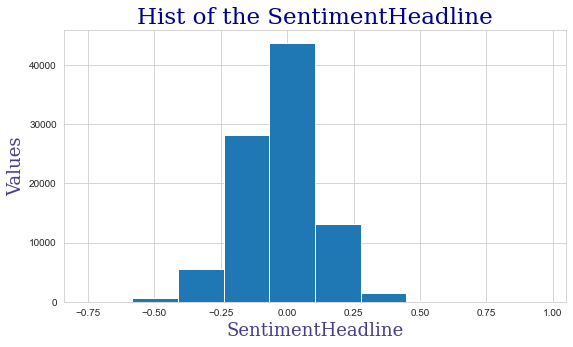

In [19]:
plt.figure(figsize=(9,5))
df_notText["SentimentHeadline"].hist()
sns.set_style("whitegrid")
plt.xlabel("SentimentHeadline",fontdict=font)
plt.ylabel("Values",fontdict=font)
plt.title("Hist of the SentimentHeadline",fontdict=font_one,loc='center')
plt.show()

In [20]:
df_notText[["Facebook","GooglePlus","LinkedIn"]].describe()

,Facebook,GooglePlus,LinkedIn
count,92945.000000,92945.000000,92945.000000
mean,113.497897,3.901124,16.600882
std,621.120839,18.520443,154.700274
min,-1.000000,-1.000000,-1.000000
25%,0.000000,0.000000,0.000000
50%,5.000000,0.000000,0.000000
75%,33.000000,2.000000,4.000000
max,49211.000000,1267.000000,20341.000000


- The above results and histogram shows that most of the data has neutral comments ,this is confirmed by the SentimentTitle and SentimentHeadline column as the 25 and 75 percentile are around the neutral value i.e. near to zero.
</br>

- Also Facebook,GooglePlus,LinkedIn , low-value means, the news was not so engaging and interesting and didn’t reach out to many people in that particular platform as confirmed by the 75% precentile of the data from the three columns are closer to 0 .
</br>

- Facebook has the higher reach as compared to GooglePlus and Linkedin.

### 2. Bivariate Analysis

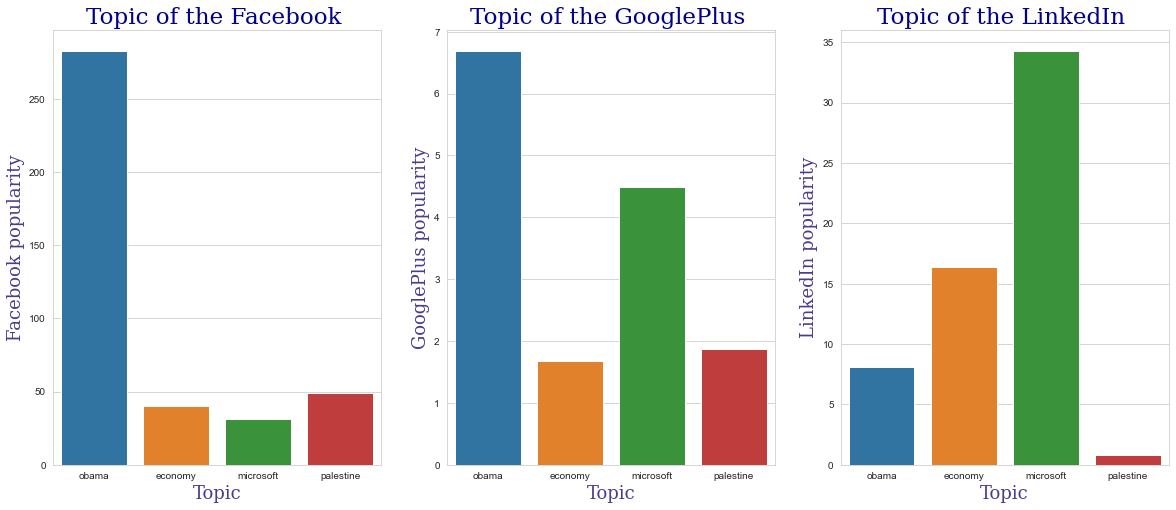

In [21]:
sns.set_style("whitegrid")
plt.figure(figsize=(20,8))
plt.subplot(1,3,1)
sns.barplot(x=df_news.Topic,y=df_news.Facebook,ci=None)
plt.xlabel("Topic",fontdict=font)
plt.ylabel("Facebook popularity",fontdict=font)
plt.title("Topic of the Facebook ",fontdict=font_one,loc='center')

plt.subplot(1,3,2)
sns.barplot(x=df_news.Topic,y=df_news.GooglePlus,ci=None)
plt.xlabel("Topic",fontdict=font)
plt.ylabel("GooglePlus popularity",fontdict=font)
plt.title("Topic of the GooglePlus ",fontdict=font_one,loc='center')

plt.subplot(1,3,3)
sns.barplot(x=df_news.Topic,y=df_news.LinkedIn,ci=None)
plt.xlabel("Topic",fontdict=font)
plt.ylabel("LinkedIn popularity",fontdict=font)
plt.title("Topic of the LinkedIn ",fontdict=font_one,loc='center')

plt.show()

### 3.Multivariate analysis

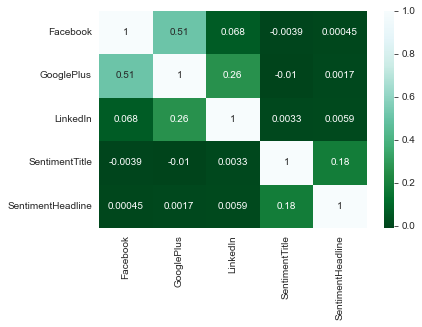

In [22]:
sns.heatmap(df_news[["Facebook","GooglePlus","LinkedIn","SentimentTitle","SentimentHeadline"]].corr(),cmap='BuGn_r',annot=True)
plt.show()

- 51% of facebook news are also share in google
- There not much correlation between target variable with independend variable

#### summary
- In count plot it can be seen that economy related news were most accurate comparing to other news
- In bievarient news topic of obama were popular in time among facebook and googleplus. while microsoft was accurately visible in linkedin

## Feature Engineering

In [23]:
# Split the values according to our requirement
# Separate the Time
df_news['Publish_Time']=df_news['PublishDate'].str.split(" ").str[1]
# Separate the date
df_news['Publish_Date']=df_news['PublishDate'].str.split(" ").str[0]
# convert for datatype
df_news['Publish_Date']= pd.to_datetime(df_news['Publish_Date'])

# Separate the month
df_news['Publish_Month']= df_news['Publish_Date'].dt.month
# Separate the day
df_news['Publish_Day']= df_news['Publish_Date'].dt.day
# Map the Month in terms of words
df_news["Season"]=df_news["Publish_Month"].copy()
df_news.Season.replace({1:'Winter',2:'Winter',3:'Spring',4:'Spring',5:'Spring',6:'Summer',7:"Summer",8:"Summer",9:"Fall",10:"Fall",11:"Fall",12:"Winter"},inplace=True)

df_news.Publish_Month.replace({1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:"July",8:"August",9:"September",10:"October",11:"November",12:"December"},inplace=True)

# Print the first 5 record
df_news.head()

,IDLink,Title,Headline,Source,Topic,PublishDate,SentimentTitle,SentimentHeadline,Facebook,GooglePlus,LinkedIn,Publish_Time,Publish_Date,Publish_Month,Publish_Day,Season
0,99248,Obama Lays Wreath at Arlington National Cemetery,Obama Lays Wreath at Arlington National Cemete...,USA TODAY,obama,2002-04-02 00:00:00,0.000000,-0.053300,-1,-1,-1,00:00:00,2002-04-02,April,2,Spring
1,10423,A Look at the Health of the Chinese Economy,"Tim Haywood, investment director business-unit...",Bloomberg,economy,2008-09-20 00:00:00,0.208333,-0.156386,-1,-1,-1,00:00:00,2008-09-20,September,20,Fall
2,18828,Nouriel Roubini: Global Economy Not Back to 2008,"Nouriel Roubini, NYU professor and chairman at...",Bloomberg,economy,2012-01-28 00:00:00,-0.425210,0.139754,-1,-1,-1,00:00:00,2012-01-28,January,28,Winter
3,27788,Finland GDP Expands In Q4,Finland's economy expanded marginally in the t...,RTT News,economy,2015-03-01 00:06:00,0.000000,0.026064,-1,-1,-1,00:06:00,2015-03-01,March,1,Spring
4,27789,"Tourism, govt spending buoys Thai economy in J...",Tourism and public spending continued to boost...,The Nation - Thailand&#39;s English news,economy,2015-03-01 00:11:00,0.000000,0.141084,-1,-1,-1,00:11:00,2015-03-01,March,1,Spring


In [24]:
df_news.drop('PublishDate',axis=1,inplace=True)

In [25]:
df_news_copy=df_news.copy()
target_variable =  list(df_news_copy["SentimentTitle"].copy())
df_news_copy.drop("SentimentTitle",axis=1,inplace=True)

## Encoding

In [26]:
# Segregate the data 
df_news_copy_object = df_news_copy.select_dtypes('object')
df_news_copy_number = df_news_copy.select_dtypes('number')

In [27]:
# Do LableEncoding 
le = preprocessing.LabelEncoder()
df_news_copy_object_enco = df_news_copy_object.apply(le.fit_transform)
df_news_copy_object_enco.head()

,Title,Headline,Source,Topic,Publish_Time,Publish_Month,Season
0,47119,46352,4995,2,0,0,1
1,1758,76110,518,0,0,11,0
2,45591,45817,518,0,0,4,3
3,18177,21729,3621,0,197,7,1
4,72633,76673,4597,0,282,7,1


In [28]:
concat_news_dataframe = pd.concat([df_news_copy_number,df_news_copy_object_enco],axis=1)

## Scalling

In [29]:
# Use StandardScaler for scaling
X_scaler = StandardScaler()
num_scaler = X_scaler.fit_transform(concat_news_dataframe)
X=pd.DataFrame(num_scaler,columns=concat_news_dataframe.columns)

## Train-Test Split

In [30]:
X_train,X_test,Y_train,Y_test = train_test_split(X,target_variable,random_state=1,test_size=0.4)

In [31]:
# Convert List into DataFrame Y_train
Y_train = pd.DataFrame(Y_train)
# Convert List into DataFrame Y_test
Y_test = pd.DataFrame(Y_test)

# checking the dimensions of the train & test subset
# print dimension of train set
print("X_train :",X_train.shape)
print("Y_train :",Y_train.shape)

# print dimension of test set
print("X_test :",X_test.shape)
print("Y_test :",Y_test.shape)

X_train : (55767, 13)
Y_train : (55767, 1)
X_test : (37178, 13)
Y_test : (37178, 1)


## Base model (LinearRegression)

In [32]:
# Use Linear Regression As a base model
base_model = LinearRegression().fit(X_train,Y_train)

In [33]:
# Check the score for base model
base_model.score(X_train,Y_train)

0.03357131449689199

In [34]:
# Predict using base model
y_pred =  base_model.predict(X_train)

# print the predicted record
y_pred

array([[-0.04162616],
       [ 0.01427337],
       [ 0.01484103],
       ...,
       [ 0.01668751],
       [ 0.0154612 ],
       [ 0.01301458]])

In [35]:
# Check the performance  of the base model using mean_squared_error
mean_squared_error(Y_train, y_pred, squared=False)

0.13400613987660245

In [36]:
# Check the performance  of the base model using mean_absolute_error
mean_absolute_error(Y_train,y_pred)

0.09690549758608462

In [37]:
# Check the performance  of the base model using root_mean_squared_error
np.sqrt(mean_squared_error(Y_train,y_pred))

0.13400613987660245

## Variance Inflation Factor(VIF)

In [38]:
# Do the feature selection for base model using VIF 
df_news_VIF_number = df_news.select_dtypes('number')
df_news_VIF_number.head()

,IDLink,SentimentTitle,SentimentHeadline,Facebook,GooglePlus,LinkedIn,Publish_Day
0,99248,0.000000,-0.053300,-1,-1,-1,2
1,10423,0.208333,-0.156386,-1,-1,-1,20
2,18828,-0.425210,0.139754,-1,-1,-1,28
3,27788,0.000000,0.026064,-1,-1,-1,1
4,27789,0.000000,0.141084,-1,-1,-1,1


In [39]:
for ind in range(len(df_news_VIF_number.columns)):
    vif = pd.DataFrame()
    vif["VIF_Factor"] = [variance_inflation_factor(df_news_VIF_number,i) for i in range(df_news_VIF_number.shape[1])]
    vif["Features"]=df_news_VIF_number.columns
    multi =  vif[vif['VIF_Factor']>10]
    
    
    if (multi.empty == False):
        df_sorted = multi.sort_values(by = 'VIF_Factor',ascending= False)
    else:
        print(vif)
        break
        
    
    if (df_sorted.empty == False):
        df_features_vif = df_news_VIF_number.drop(df_sorted.Features.iloc[0], axis=1)
    else:
        print(vif)
        break

   VIF_Factor           Features
0    2.363040             IDLink
1    1.036659     SentimentTitle
2    1.067113  SentimentHeadline
3    1.416700           Facebook
4    1.515392         GooglePlus
5    1.093871           LinkedIn
6    2.338872        Publish_Day


In [40]:
# We can see here that all Features contribute for prediction that is why all features are important

In [41]:
# After doing Linear regression we found that regression model is not good fit for this data so we decided to go for DecisionTreeClassifier

# Decision Tree 

In [42]:
df_news["target_sentiment"] = np.round(df_news["SentimentTitle"])

In [43]:
df_news.target_sentiment.value_counts()

 0.0    92640
-1.0      172
 1.0      133
Name: target_sentiment, dtype: int64

In [44]:
# As we can see here the data is Imbalance(target Varible)

In [45]:
# We are using oversampling and undersampling concept to balance the data 

In [46]:
avg=df_news[df_news["target_sentiment"]==0]

In [47]:
high = df_news[df_news["target_sentiment"]==1]

In [48]:
below_avg=df_news[df_news["target_sentiment"]==-1]

In [49]:
X1=df_news
Y1= df_news["target_sentiment"]

In [50]:
df_news.drop("target_sentiment",axis=1,inplace=True)

In [51]:
# Use Undersampling Concept

In [52]:
from imblearn.under_sampling import RandomUnderSampler

rus =  RandomUnderSampler(random_state=0)
X_resampled,y_resampled = rus.fit_resample(X1,Y1)
print(sorted(Counter(y_resampled).items()),y_resampled.shape)

[(-1.0, 133), (0.0, 133), (1.0, 133)] (399,)


In [53]:
under_sample=pd.concat([X_resampled,y_resampled],axis=1)

In [54]:
under_sample.drop('target_sentiment', axis=1, inplace=True)
under_sample.drop("SentimentTitle",axis=1,inplace=True)

In [55]:
under_sample=pd.concat([X_resampled,y_resampled],axis=1)
under_sample.head()

,IDLink,Title,Headline,Source,Topic,SentimentTitle,SentimentHeadline,Facebook,GooglePlus,LinkedIn,Publish_Time,Publish_Date,Publish_Month,Publish_Day,Season,target_sentiment
0,72641,Palestinian resolution,"Last week, Mumbai witnessed a cultural collabo...",Livemint,palestine,-0.530330,-0.212156,20,0,0,17:10:00,2016-01-15,January,15,Winter,-1.0
1,98407,Okinawa largely disappointed by Obama's words ...,U.S. President Barack Obama's condolences on M...,Asahi Shimbun,obama,-0.640816,-0.218651,11,0,0,06:15:28,2016-05-26,May,26,Spring,-1.0
2,20835,"Cloud growth? Take a number, Microsoft. Two en...",Microsoft's second fiscal quarter showed a com...,The Register,microsoft,-0.515352,-0.164583,4,4,37,00:40:27,2016-01-30,January,30,Winter,-1.0
3,17201,Ontario economy posts modest third-quarter gro...,Ontario Finance Minister Charles Sousa: 'In an...,Mississauga,economy,-0.592927,0.147314,1,0,0,13:55:20,2016-01-16,January,16,Winter,-1.0
4,45381,Simon CEO: 'Flatlining' economy hurting malls ...,"Simon, the CEO of Indianapolis-based mall owne...",Indianapolis Star,economy,-0.675000,0.000000,4,0,0,20:53:00,2016-04-26,April,26,Spring,-1.0


In [56]:
# change target variable data type into object
under_sample.target_sentiment= under_sample.target_sentiment.astype('object')
target_variable_under = list(under_sample.target_sentiment.copy())
under_sample.drop("target_sentiment",axis=1,inplace=True)

In [57]:
# change data type of date column
under_sample.Publish_Time = pd.to_timedelta(under_sample.Publish_Time)

In [58]:
# Segregate the data 
under_sample_object = under_sample.select_dtypes('object')
under_sample_number = under_sample.select_dtypes('number')

In [59]:
# Do LableEncoding 
le = preprocessing.LabelEncoder()
under_sample_label_enco = under_sample_object[["Title","Headline","Source"]].apply(le.fit_transform)
under_sample_dummy_enco = pd.get_dummies(under_sample_object[["Topic","Publish_Month","Season"]])
concat_under_sample_dataframe = pd.concat([under_sample_label_enco,under_sample_number],axis=1)
concat_under_sample_dataframe.head()

,Title,Headline,Source,IDLink,SentimentTitle,SentimentHeadline,Facebook,GooglePlus,LinkedIn,Publish_Time,Publish_Day
0,261,152,108,72641,-0.530330,-0.212156,20,0,0,0 days 17:10:00,15
1,243,343,17,98407,-0.640816,-0.218651,11,0,0,0 days 06:15:28,26
2,47,181,222,20835,-0.515352,-0.164583,4,4,37,0 days 00:40:27,30
3,245,204,123,17201,-0.592927,0.147314,1,0,0,0 days 13:55:20,16
4,299,260,91,45381,-0.675000,0.000000,4,0,0,0 days 20:53:00,26


In [60]:
concat_under_sample_dataframe.drop("Publish_Time",axis=1,inplace=True)

In [61]:
X_scaler_under = StandardScaler()
num_scaler_under = X_scaler_under.fit_transform(concat_under_sample_dataframe)
X_under=pd.DataFrame(num_scaler_under,columns=concat_under_sample_dataframe.columns)
X_under = pd.concat([X_under,under_sample_dummy_enco],axis=1)
X_under.head()

,Title,Headline,Source,IDLink,SentimentTitle,SentimentHeadline,Facebook,GooglePlus,LinkedIn,Publish_Day,...,Publish_Month_July,Publish_Month_June,Publish_Month_March,Publish_Month_May,Publish_Month_November,Publish_Month_October,Season_Fall,Season_Spring,Season_Summer,Season_Winter
0,0.767970,-0.384435,-0.303280,0.730160,-1.105060,-1.152656,-0.173424,-0.267231,-0.191663,-0.185120,...,0,0,0,0,0,0,0,0,0,1
1,0.597363,1.312982,-1.417270,1.597724,-1.331303,-1.187838,-0.223102,-0.267231,-0.191663,1.064869,...,0,0,0,1,0,0,0,1,0,0
2,-1.260361,-0.126712,1.092268,-1.014192,-1.074389,-0.894929,-0.261740,0.146847,0.542325,1.519410,...,0,0,0,0,0,0,0,0,0,1
3,0.616320,0.077689,-0.119655,-1.136552,-1.233241,0.794775,-0.278300,-0.267231,-0.191663,-0.071485,...,0,0,0,0,0,0,0,0,0,1
4,1.128141,0.575361,-0.511388,-0.187707,-1.401303,-0.003298,-0.261740,-0.267231,-0.191663,1.064869,...,0,0,0,0,0,0,0,1,0,0


### Train-Test Split

In [62]:
x_train_under,x_test_under,y_train_under,y_test_under=train_test_split(X_under,target_variable_under,random_state=1,test_size=0.3)

In [63]:
# Convert List into DataFrame y_train_under
y_train_under = pd.DataFrame(y_train_under)
# Convert List into DataFrame y_test_under
y_test_under = pd.DataFrame(y_test_under)

# checking the dimensions of the train & test subset
# print dimension of train set
print("x_train_under :",x_train_under.shape)
print("y_train_under :",y_train_under.shape)

# print dimension of test set
print("x_test_under :",x_test_under.shape)
print("y_test_under :",y_test_under.shape)

x_train_under : (279, 28)
y_train_under : (279, 1)
x_test_under : (120, 28)
y_test_under : (120, 1)


## Decision tree model

In [64]:
# Initialize the decision tree
decision_tree_clasifier=DecisionTreeClassifier(criterion='entropy',random_state=10)

In [65]:
# Fit the model
decision_tree=decision_tree_clasifier.fit(x_train_under,y_train_under)

In [66]:
# prediction for training data
predict_train=decision_tree.predict(x_train_under)

# prediction for testing data
predict_test=decision_tree.predict(x_test_under)

In [67]:
confusion_matrix(y_train_under,predict_train)

array([[95,  0,  0],
       [ 0, 96,  0],
       [ 0,  0, 88]], dtype=int64)

In [68]:
confusion_matrix(y_test_under,predict_test)

array([[38,  0,  0],
       [ 0, 36,  1],
       [ 0,  0, 45]], dtype=int64)

In [69]:
# Classification report for traning data
print(classification_report(y_train_under,predict_train))

              precision    recall  f1-score   support

        -1.0       1.00      1.00      1.00        95
         0.0       1.00      1.00      1.00        96
         1.0       1.00      1.00      1.00        88

    accuracy                           1.00       279
   macro avg       1.00      1.00      1.00       279
weighted avg       1.00      1.00      1.00       279



In [70]:
# Classification report for testing data
print(classification_report(y_test_under,predict_test))

              precision    recall  f1-score   support

        -1.0       1.00      1.00      1.00        38
        -0.0       1.00      0.97      0.99        37
         1.0       0.98      1.00      0.99        45

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



In [71]:
# our model is performing well there is no underfiting problem

In [72]:
# Tune the model using hyperparameter

In [73]:
# Set the hyperparameter
tuned_params=[{'criterion':['entopy','gini'],'max_depth':[10,20,30],'max_features':['log2','sqrt'],'min_samples_split':[2,5,8,11],'min_samples_leaf':[1,5,9],'max_leaf_nodes':[10,30,50,70]}]

In [74]:
# Find the best hyperparameter using grid serch cv
over_tree_grid=GridSearchCV(estimator=decision_tree_clasifier,param_grid=tuned_params,cv=5)
model = over_tree_grid.fit(x_train_under,y_train_under)
print(model.best_params_)

{'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2', 'max_leaf_nodes': 50, 'min_samples_leaf': 1, 'min_samples_split': 11}


## Make a new model with good hyperpatameter

In [75]:
# Initialize the dt with good hyperparameter that we found using grid search CV
dt1 =DecisionTreeClassifier(criterion='gini',random_state=10,max_depth=20,max_features='log2',
                            max_leaf_nodes=70,min_samples_leaf=1,min_samples_split=2)

In [76]:
# fit the model on the data 
final_model = dt1.fit(x_train_under,y_train_under)

In [77]:
# predict for traning 
predicted_train = final_model.predict(x_train_under)

# predict for testing  
predicted_test = final_model.predict(x_test_under)

In [78]:
# Classification report for traing data
print(classification_report(y_train_under,predicted_train))

              precision    recall  f1-score   support

        -1.0       0.87      0.92      0.89        95
         0.0       0.92      0.94      0.93        96
         1.0       1.00      0.92      0.96        88

    accuracy                           0.92       279
   macro avg       0.93      0.92      0.93       279
weighted avg       0.93      0.92      0.93       279



In [79]:
#  Classification report for testing data
print(classification_report(y_test_under,predicted_test))

              precision    recall  f1-score   support

        -1.0       0.62      0.66      0.64        38
        -0.0       0.56      0.65      0.60        37
         1.0       0.78      0.64      0.71        45

    accuracy                           0.65       120
   macro avg       0.66      0.65      0.65       120
weighted avg       0.66      0.65      0.65       120



As we can see model is overfitted, the reason is traing accurecy is 92% and testing accurecy 65%

## Oversampling concept 

In [80]:
from imblearn.over_sampling import RandomOverSampler

rus =  RandomOverSampler(random_state=0)
X_resampled_over,y_resampled_over = rus.fit_resample(X1,Y1)
print(sorted(Counter(y_resampled_over).items()),y_resampled_over.shape)
over_sample=pd.concat([X_resampled_over,y_resampled_over],axis=1)
over_sample.head()

[(-1.0, 92640), (0.0, 92640), (1.0, 92640)] (277920,)


,IDLink,Title,Headline,Source,Topic,SentimentTitle,SentimentHeadline,Facebook,GooglePlus,LinkedIn,Publish_Time,Publish_Date,Publish_Month,Publish_Day,Season,target_sentiment
0,99248,Obama Lays Wreath at Arlington National Cemetery,Obama Lays Wreath at Arlington National Cemete...,USA TODAY,obama,0.000000,-0.053300,-1,-1,-1,00:00:00,2002-04-02,April,2,Spring,0.0
1,10423,A Look at the Health of the Chinese Economy,"Tim Haywood, investment director business-unit...",Bloomberg,economy,0.208333,-0.156386,-1,-1,-1,00:00:00,2008-09-20,September,20,Fall,0.0
2,18828,Nouriel Roubini: Global Economy Not Back to 2008,"Nouriel Roubini, NYU professor and chairman at...",Bloomberg,economy,-0.425210,0.139754,-1,-1,-1,00:00:00,2012-01-28,January,28,Winter,-0.0
3,27788,Finland GDP Expands In Q4,Finland's economy expanded marginally in the t...,RTT News,economy,0.000000,0.026064,-1,-1,-1,00:06:00,2015-03-01,March,1,Spring,0.0
4,27789,"Tourism, govt spending buoys Thai economy in J...",Tourism and public spending continued to boost...,The Nation - Thailand&#39;s English news,economy,0.000000,0.141084,-1,-1,-1,00:11:00,2015-03-01,March,1,Spring,0.0


In [81]:
# change target variable data type into object
over_sample.target_sentiment= over_sample.target_sentiment.astype('object')
target_variable_over = list(over_sample.target_sentiment.copy())
over_sample.drop("target_sentiment",axis=1,inplace=True)

In [82]:
over_sample_object = over_sample.select_dtypes('object')
over_sample_number = over_sample.select_dtypes('number')

In [83]:
le = preprocessing.LabelEncoder()
over_sample_label_enco = over_sample_object[["Title","Headline","Source"]].apply(le.fit_transform)
over_sample_label_enco.head()

,Title,Headline,Source
0,47119,46352,4995
1,1758,76110,518
2,45591,45817,518
3,18177,21729,3621
4,72633,76673,4597


**Encode the each categorical**

In [84]:
over_sample_dummy_enco = pd.get_dummies(over_sample_object[["Topic","Publish_Month","Season"]])

In [85]:
concat_over_sample_dataframe = pd.concat([over_sample_label_enco,over_sample_number],axis=1)
concat_over_sample_dataframe.head()

,Title,Headline,Source,IDLink,SentimentTitle,SentimentHeadline,Facebook,GooglePlus,LinkedIn,Publish_Day
0,47119,46352,4995,99248,0.000000,-0.053300,-1,-1,-1,2
1,1758,76110,518,10423,0.208333,-0.156386,-1,-1,-1,20
2,45591,45817,518,18828,-0.425210,0.139754,-1,-1,-1,28
3,18177,21729,3621,27788,0.000000,0.026064,-1,-1,-1,1
4,72633,76673,4597,27789,0.000000,0.141084,-1,-1,-1,1


In [86]:
X_scaler_over = StandardScaler()
num_scaler_over = X_scaler.fit_transform(concat_over_sample_dataframe)
X_over=pd.DataFrame(num_scaler_over,columns=concat_over_sample_dataframe.columns)
X_over = pd.concat([X_over,over_sample_dummy_enco],axis=1)
X_over.head()

,Title,Headline,Source,IDLink,SentimentTitle,SentimentHeadline,Facebook,GooglePlus,LinkedIn,Publish_Day,...,Publish_Month_June,Publish_Month_March,Publish_Month_May,Publish_Month_November,Publish_Month_October,Publish_Month_September,Season_Fall,Season_Spring,Season_Summer,Season_Winter
0,0.213169,0.082633,1.237859,1.637338,-0.013450,-0.304755,-0.181104,-0.302878,-0.131689,-1.595826,...,0,0,0,0,0,0,0,1,0,0
1,-1.715737,1.238428,-1.343713,-1.410554,0.412868,-0.857541,-0.181104,-0.302878,-0.131689,0.413311,...,0,0,0,0,0,1,1,0,0,0
2,0.148194,0.061854,-1.343713,-1.122149,-0.883566,0.730480,-0.181104,-0.302878,-0.131689,1.306261,...,0,0,0,0,0,0,0,0,0,1
3,-1.017545,-0.873720,0.445570,-0.814701,-0.013450,0.120829,-0.181104,-0.302878,-0.131689,-1.707445,...,0,1,0,0,0,0,0,1,0,0
4,1.298113,1.260295,1.008361,-0.814667,-0.013450,0.737613,-0.181104,-0.302878,-0.131689,-1.707445,...,0,1,0,0,0,0,0,1,0,0


## Train-Test Split

In [87]:
x_train_over,x_test_over,y_train_over,y_test_over=train_test_split(X_over,target_variable_over,random_state=1,test_size=0.3)

In [88]:
# Convert List into DataFrame y_train_over
y_train_over = pd.DataFrame(y_train_over)
# Convert List into DataFrame y_test_over
y_test_over = pd.DataFrame(y_test_over)

# checking the dimensions of the train & test subset
# print dimension of train set
print("x_train_over :",x_train_over.shape)
print("y_train_over :",y_train_over.shape)

# print dimension of test set
print("x_test_over :",x_test_over.shape)
print("y_test_over :",y_test_over.shape)

x_train_over : (194544, 30)
y_train_over : (194544, 1)
x_test_over : (83376, 30)
y_test_over : (83376, 1)


In [89]:
# Initialize the decision tree for oversampling concept
decision_tree_clasifier=DecisionTreeClassifier(criterion='entropy',random_state=10)

In [90]:
# fit the model
decision_tree=decision_tree_clasifier.fit(x_train_over,y_train_over)

In [91]:
# predict for traing data
predict_train_over=decision_tree.predict(x_train_over)
predict_train_over

# predict for testing data
predict_test_over=decision_tree.predict(x_test_over)
predict_test_over

array([ 1.,  0.,  1., ...,  0., -1.,  1.])

In [92]:
confusion_matrix(y_train_over,predict_train_over)

array([[64997,     0,     0],
       [    0, 64700,     0],
       [    0,     0, 64847]], dtype=int64)

In [93]:
confusion_matrix(y_test_over,predict_test_over)

array([[27643,     0,     0],
       [    0, 27940,     0],
       [    0,     0, 27793]], dtype=int64)

In [94]:
# Classification report for traning data
print(classification_report(y_train_over,predict_train_over))

              precision    recall  f1-score   support

        -1.0       1.00      1.00      1.00     64997
         0.0       1.00      1.00      1.00     64700
         1.0       1.00      1.00      1.00     64847

    accuracy                           1.00    194544
   macro avg       1.00      1.00      1.00    194544
weighted avg       1.00      1.00      1.00    194544



In [95]:
# classification report for testing data
print(classification_report(y_test_over,predict_test_over))

              precision    recall  f1-score   support

        -1.0       1.00      1.00      1.00     27643
         0.0       1.00      1.00      1.00     27940
         1.0       1.00      1.00      1.00     27793

    accuracy                           1.00     83376
   macro avg       1.00      1.00      1.00     83376
weighted avg       1.00      1.00      1.00     83376



In [96]:
# Our model is performing well there is no overfiting problem

In [97]:
# Tune the model using hyperparameter

In [98]:
tuned_params=[{'criterion':['entopy','gini'],'max_depth':[10,20,30],'max_features':['log2','sqrt'],'min_samples_split':[2,5,8,11],'min_samples_leaf':[1,5,9],'max_leaf_nodes':[10,30,50,70]}]

In [99]:
over_tree_grid=GridSearchCV(estimator=decision_tree_clasifier,param_grid=tuned_params,cv=5)
model = over_tree_grid.fit(x_train_over,y_train_over)
print(model.best_params_)

{'criterion': 'gini', 'max_depth': 20, 'max_features': 'sqrt', 'max_leaf_nodes': 70, 'min_samples_leaf': 5, 'min_samples_split': 2}


## Decision tree model for oversampling concept (Best Hyperpatameter)

In [100]:
dt2 =DecisionTreeClassifier(criterion='gini',random_state=10,max_depth=20,max_features='log2',
                            max_leaf_nodes=70,min_samples_leaf=1,min_samples_split=2)

In [101]:
# Fit the model on the data
final_model = dt2.fit(x_train_over,y_train_over)

# predict for traing data
predicted_train = final_model.predict(x_train_over)

# predict for testing data
predicted_test = final_model.predict(x_test_over)

In [102]:
print(classification_report(y_train_over,predict_train_over))

              precision    recall  f1-score   support

        -1.0       1.00      1.00      1.00     64997
         0.0       1.00      1.00      1.00     64700
         1.0       1.00      1.00      1.00     64847

    accuracy                           1.00    194544
   macro avg       1.00      1.00      1.00    194544
weighted avg       1.00      1.00      1.00    194544



In [103]:
print(classification_report(y_test_over,predict_test_over))

              precision    recall  f1-score   support

        -1.0       1.00      1.00      1.00     27643
         0.0       1.00      1.00      1.00     27940
         1.0       1.00      1.00      1.00     27793

    accuracy                           1.00     83376
   macro avg       1.00      1.00      1.00     83376
weighted avg       1.00      1.00      1.00     83376



In [104]:
# As we can see here oversampling concept good fit for the data
# That proven by seen the accuracy of traing and testing 